In [ ]:
import sys

import pandas as pd
import numpy as np
import anndata

from data_processing.data_loader import DataLoader
from data_processing.split_cell import split_cell
from data_processing.preprocess import Preprocess_gene
from data_processing.data import TwitterDataset
%config InlineBackend.figure_format = 'svg'

In [ ]:
#Input the gene expression matrix, with gene names as row names and cell names as column names.
adata = sc.read_h5ad("./example/Baron_mouse.h5ad")
fil_type2 = adata.obs.copy()

#Read the matrix with the mouse genes converted to human gene names.
new_expression2=pd.read_csv("./example/count.txt",sep="\t",index_col=0)

In [ ]:
adata2 = sc.read_h5ad("./example/Baron_human.h5ad")

#Convert the gene expression matrix into a DataFrame, where rows represent cells and columns represent genes.
expression_matrix = adata2.X.toarray() 

new_expression = pd.DataFrame(
    expression_matrix, 
    index=adata2.obs.index,
    columns=adata2.var.index 
)

new_expression1=new_expression.T
#Extract the cell annotation information and convert it into a DataFrame.
fil_type1 = adata2.obs.copy()

In [4]:
fil_type1['index']=fil_type1.index
fil_type2['index']=fil_type2.index

In [ ]:
#Rebuild the naming structure.
fil_type1=fil_type1[['organism','index','cell_ontology_class']]
fil_type2=fil_type2[['organism','index','cell_ontology_class']]

fil_merged = pd.concat([fil_type1, fil_type2], axis=0)
fil_merged

organism                        index  \
cell_id                                                                  
human1_lib1.final_cell_0001  Homo sapiens  human1_lib1.final_cell_0001   
human1_lib1.final_cell_0002  Homo sapiens  human1_lib1.final_cell_0002   
human1_lib1.final_cell_0003  Homo sapiens  human1_lib1.final_cell_0003   
human1_lib1.final_cell_0004  Homo sapiens  human1_lib1.final_cell_0004   
human1_lib1.final_cell_0005  Homo sapiens  human1_lib1.final_cell_0005   
...                                   ...                          ...   
mouse2_lib3.final_cell_0391  Mus musculus  mouse2_lib3.final_cell_0391   
mouse2_lib3.final_cell_0392  Mus musculus  mouse2_lib3.final_cell_0392   
mouse2_lib3.final_cell_0393  Mus musculus  mouse2_lib3.final_cell_0393   
mouse2_lib3.final_cell_0394  Mus musculus  mouse2_lib3.final_cell_0394   
mouse2_lib3.final_cell_0395  Mus musculus  mouse2_lib3.final_cell_0395   

                                  cell_ontology_class  
cell_id                                                
human1_lib1.final_cell_0001    pancreatic acinar cell  
human1_lib1.final_cell_0002    pancreatic acinar cell  
human1_lib1.final_cell_0003    pancreatic acinar cell  
human1_lib1.final_cell_0004    pancreatic acinar cell  
human1_lib1.final_cell_0005    pancreatic acinar cell  
...                                               ...  
mouse2_lib3.final_cell_0391    type B pancreatic cell  
mouse2_lib3.final_cell_0392    type B pancreatic cell  
mouse2_lib3.final_cell_0393    pancreatic ductal cell  
mouse2_lib3.final_cell_0394  pancreatic stellate cell  
mouse2_lib3.final_cell_0395    pancreatic ductal cell  

[10455 rows x 3 columns]

In [8]:
common_index = new_expression1.index.intersection(new_expression2.index)
df1_filtered = new_expression1.loc[common_index]
df2_filtered = new_expression2.loc[common_index]

df_merged = pd.concat([df1_filtered, df2_filtered], axis=1)
df_merged

human1_lib1.final_cell_0001  human1_lib1.final_cell_0002  \
A1CF                            4.0                          0.0   
A4GALT                          0.0                          0.0   
AAAS                            0.0                          0.0   
AACS                            0.0                          2.0   
AADAC                           6.0                          8.0   
...                             ...                          ...   
ZXDC                            0.0                          0.0   
ZYG11B                          0.0                          1.0   
ZYX                             2.0                          4.0   
ZZEF1                           0.0                          0.0   
ZZZ3                            0.0                          1.0   

        human1_lib1.final_cell_0003  human1_lib1.final_cell_0004  \
A1CF                            0.0                          0.0   
A4GALT                          0.0                          0.0   
AAAS                            0.0                          1.0   
AACS                            0.0                          0.0   
AADAC                           0.0                          0.0   
...                             ...                          ...   
ZXDC                            0.0                          0.0   
ZYG11B                          0.0                          1.0   
ZYX                             0.0                          3.0   
ZZEF1                           0.0                          1.0   
ZZZ3                            0.0                          0.0   

        human1_lib1.final_cell_0005  human1_lib1.final_cell_0006  \
A1CF                            0.0                          1.0   
A4GALT                          0.0                          0.0   
AAAS                            0.0                          0.0   
AACS                            0.0                          2.0   
AADAC                           0.0                         13.0   
...                             ...                          ...   
ZXDC                            0.0                          0.0   
ZYG11B                          0.0                          0.0   
ZYX                             1.0                          1.0   
ZZEF1                           0.0                          1.0   
ZZZ3                            0.0                          1.0   

        human1_lib1.final_cell_0007  human1_lib1.final_cell_0008  \
A1CF                            0.0                          1.0   
A4GALT                          0.0                          0.0   
AAAS                            0.0                          1.0   
AACS                            0.0                          0.0   
AADAC                           0.0                          0.0   
...                             ...                          ...   
ZXDC                            0.0                          0.0   
ZYG11B                          1.0                          0.0   
ZYX                             1.0                          1.0   
ZZEF1                           0.0                          0.0   
ZZZ3                            1.0                          0.0   

        human1_lib1.final_cell_0009  human1_lib1.final_cell_0010  ...  \
A1CF                            0.0                          0.0  ...   
A4GALT                          0.0                          0.0  ...   
AAAS                            0.0                          0.0  ...   
AACS                            1.0                          0.0  ...   
AADAC                           0.0                          1.0  ...   
...                             ...                          ...  ...   
ZXDC                            0.0                          0.0  ...   
ZYG11B                          0.0                          1.0  ...   
ZYX                             2.0                          0.0  ...   
ZZEF1     

In [ ]:
#Process the metadata and the corresponding data.
loader1 = DataLoader(expression_matrix_1=df_merged, cell_labels_1=fil_merged, top_genes=1000, mode="target",cell_name_column='index')

ref_dat, ref_label, ref_cell_labels = loader1.process_data()

print("Updated ref_cell_labels:")
print(ref_cell_labels)

更新后的 ref_cell_labels:
                                 organism                        index  \
cell_id                                                                  
human1_lib1.final_cell_0001  Homo sapiens  human1_lib1.final_cell_0001   
human1_lib1.final_cell_0002  Homo sapiens  human1_lib1.final_cell_0002   
human1_lib1.final_cell_0003  Homo sapiens  human1_lib1.final_cell_0003   
human1_lib1.final_cell_0004  Homo sapiens  human1_lib1.final_cell_0004   
human1_lib1.final_cell_0005  Homo sapiens  human1_lib1.final_cell_0005   
...                                   ...                          ...   
mouse2_lib3.final_cell_0391  Mus musculus  mouse2_lib3.final_cell_0391   
mouse2_lib3.final_cell_0392  Mus musculus  mouse2_lib3.final_cell_0392   
mouse2_lib3.final_cell_0393  Mus musculus  mouse2_lib3.final_cell_0393   
mouse2_lib3.final_cell_0394  Mus musculus  mouse2_lib3.final_cell_0394   
mouse2_lib3.final_cell_0395  Mus musculus  mouse2_lib3.final_cell_0395   

               

In [ ]:
#Encode genes using the trained w2v model. The default path uses the trained model.
#If you have your own trained w2v vectors, you can add them manually—make sure the version number matches.
preprocess = Preprocess_gene(ref_dat, sen_len=1000)
embedding = preprocess.make_embedding()
gene_name = preprocess.sentence_word2idx()
gene_label = preprocess.labels_to_tensor(ref_label)

Get embedding ...
loading word to vec model ...
get words #84312
total words: 84315


In [ ]:
#Switch the mode to "single" for the application process.
ref_dataset = TwitterDataset(x=gene_name, z=gene_label, mode="single")

In [ ]:
#Use the trained AlignCell model for the cell embedding process.
from get_result.Get_emb import AlignCell_Emb
from AlignCell import TransformerEncoder, PositionalEncoding, EncoderLayer, FeedForward

emb_dat=AlignCell_Emb("./end_multi_mouse_species_model/FineTurn_no_mtDNA.model")
ref_label, ref_embed=emb_dat.get_embeddings(ref_dataset)
aligncell_emb=emb_dat.generate_dataframe(ref_embed, ref_label, dataset=ref_dataset)
aligncell_emb.index=ref_cell_labels['index']
aligncell_emb

Processing Dataset: 100%|██████████| 10455/10455 [01:47<00:00, 97.25it/s]


0         1         2         3         4    \
index                                                                           
human1_lib1.final_cell_0001 -2.282046 -0.377758  1.020611  1.464528  0.549960   
human1_lib1.final_cell_0002 -2.431451 -0.411184  1.037185  1.443548  0.745994   
human1_lib1.final_cell_0003 -2.162092 -0.342269  1.022868  1.526145  0.885929   
human1_lib1.final_cell_0004 -2.256766 -0.163677  0.327974  0.933074  0.178000   
human1_lib1.final_cell_0005 -2.465252 -0.406872  1.258368  1.532444  0.761630   
...                               ...       ...       ...       ...       ...   
mouse2_lib3.final_cell_0391  0.600558 -0.101533 -0.593869 -0.823731 -0.329563   
mouse2_lib3.final_cell_0392  0.640233 -0.335107 -0.664149 -0.947572 -0.360471   
mouse2_lib3.final_cell_0393  0.328381  0.016347 -0.820356  0.670306 -0.781697   
mouse2_lib3.final_cell_0394  1.417937 -0.352570  0.530462  2.031624  0.261919   
mouse2_lib3.final_cell_0395 -0.009440  0.061340 -0.853872  0.529165 -0.585108   

                                  5         6         7         8         9    \
index                                                                           
human1_lib1.final_cell_0001 -0.030174  0.302883  0.495254  0.614198  0.555389   
human1_lib1.final_cell_0002 -0.258651  0.586971  0.445773  0.750320  0.313106   
human1_lib1.final_cell_0003 -0.189542  0.742300  0.844409  1.035287  0.212242   
human1_lib1.final_cell_0004  0.318638  0.081878  0.267066  0.584853  0.749999   
human1_lib1.final_cell_0005 -0.236919  0.549010  0.558758  0.706021  0.346160   
...                               ...       ...       ...       ...       ...   
mouse2_lib3.final_cell_0391 -0.387878 -1.677910  0.275675 -1.066872 -1.185361   
mouse2_lib3.final_cell_0392 -0.367723 -1.736257  0.005876 -1.087612 -1.303946   
mouse2_lib3.final_cell_0393  0.970291 -0.259503  0.390214 -0.384416  0.260560   
mouse2_lib3.final_cell_0394 -1.574210 -0.435916 -1.540848 -0.699839  2.033181   
mouse2_lib3.final_cell_0395  1.315078 -0.696672  0.871983  0.099467 -0.125317   

                             ...       246       247       248       249  \
index                        ...                                           
human1_lib1.final_cell_0001  ...  0.358946 -0.850440  0.174126 -1.673231   
human1_lib1.final_cell_0002  ...  0.228430 -1.020708 -0.079525 -1.319748   
human1_lib1.final_cell_0003  ...  0.010783 -1.129764 -0.228207 -1.395122   
human1_lib1.final_cell_0004  ...  0.706718 -0.350765  0.305582 -1.415130   
human1_lib1.final_cell_0005  ...  0.197587 -1.089568  0.017972 -1.504536   
...                          ...       ...       ...       ...       ...   
mouse2_lib3.final_cell_0391  ... -1.060934  0.617690  0.515109 -0.516005   
mouse2_lib3.final_cell_0392  ... -1.129932  0.284460  0.403310 -0.698817   
mouse2_lib3.final_cell_0393  ...  0.468046  1.151403  0.788576 -0.787967   
mouse2_lib3.final_cell_0394  ...  2.350103  1.978941 -0.588622  0.893246   
mouse2_lib3.final_cell_0395  ...  0.064181  0.968042 -0.437928 -0.625337   

                                  250       251       252       253       254  \
index                                                                           
human1_lib1.final_cell_0001  0.599576 -0.787373  0.638536 -0.404763 -0.205940   
human1_lib1.final_cell_0002  0.359629 -0.699298  0.935543 -0.619760 -0.046885   
human1_lib1.final_cell_0003  0.322640 -0.692148  0.981667 -0.690364 -0.165209   
human1_lib1.final_cell_0004  0.172958 -0.789780  0.427239 -0.043546 -0.676486   
human1_lib1.final_cell_0005  0.487452 -0.697263  0.931633 -0.634459 -0.023809   
...                               ...       ...       ...       ...       ...   
mouse2_lib3.final_cell_0391  0.085842 -0.160934 -3.515836  1.413252  2.675810   
mouse2_lib3.final_cell_0392  0.271410 -0.188441 -3.303297  1.232574  2.707621   
mouse2_lib3.final_cell_0393 -2.117403 -0.119567 -1.092838  1.711808 -0.622261   
mouse2_lib3.final_cell_0394  1.498859  0.96311

In [ ]:
#Write the aligncell_emb into the object constructed by Scanpy for subsequent dimensionality reduction analysis.
#adata.obsm["AlignCell"] =aligncell_emb.values

In [ ]:
#Use the UMAP parameters in Python for dimensionality reduction and plotting.
#The results may differ slightly from those produced by Scanpy due to different default settings or parameter configurations.
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
reducer = umap.UMAP(n_jobs=1, random_state=1)
umap_embedding = reducer.fit_transform(aligncell_emb)
#Create a new DataFrame to store the results of the dimensionality reduction.
embedding_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['Source'] = ref_cell_labels['organism'].tolist()
embedding_df['Cell_Name'] = ref_cell_labels['index'].tolist()
embedding_df['Type'] = ref_cell_labels['cell_ontology_class'].tolist()

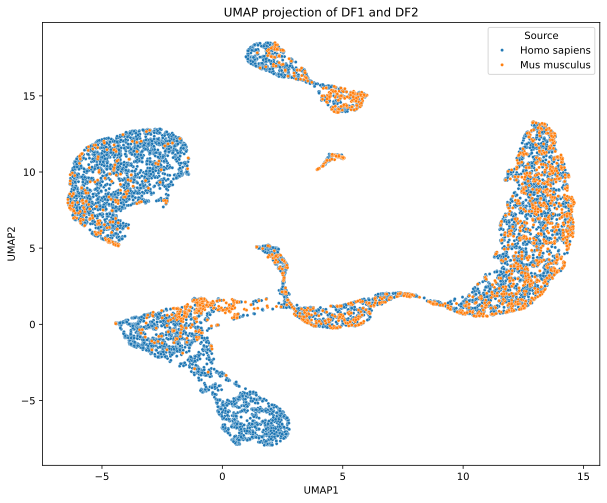

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='Source', alpha=1, s=10)
plt.title('UMAP projection of DF1 and DF2')
plt.show()

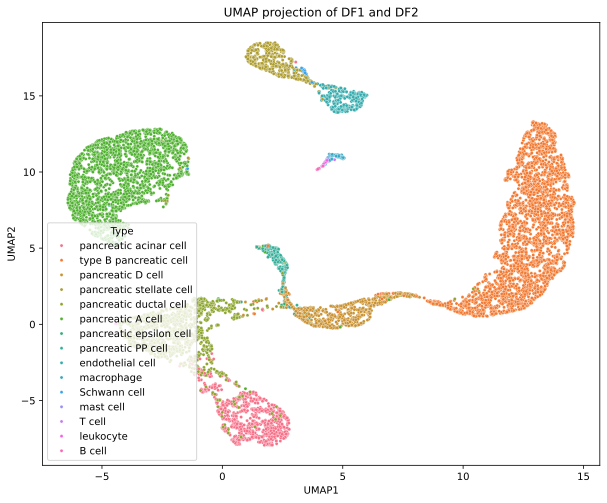

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='Type',alpha=1, s=10)
plt.title('UMAP projection of DF1 and DF2')
plt.show()